<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/1_A_Gradient_Boosting_Regression_And_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,plot_tree

# Regression

**Algorithm of the Gradient Boost - Regression**:
>. The first model prediction is always the mean of the y_train samples

>. The residuals are basically the difference between the actual prediction and model prediction. For the first stage of the algorithm the model prediction is simply the mean of the y_train.

>. Then the first decision tree is trained on X_train and residuals. After that the output of the decision tree and added with the previous prediction. Similarly this two steps are repeated again and again for nth decision trees.

>. After some sequence of steps we will get our additive model. Additive model is a model which is made by simply adding n-number of weak learners together which will provide a low variance and low bias results

>. After $N$ iteration the additive function that holds our model will be:
$$
F_N(x) = F_0(x) + \eta \sum_{n=1}^{N} h_n(x)
$$

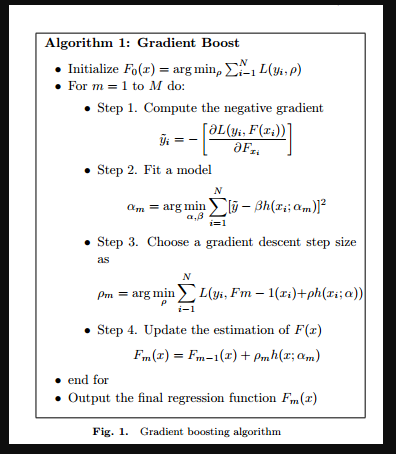

Sample Dataset
          X         y
0 -0.125460  0.051573
1  0.450714  0.594480
2  0.231994  0.166052
3  0.098658 -0.070178


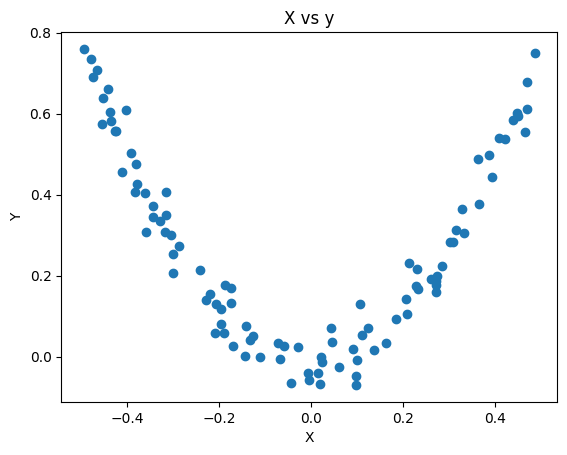

In [3]:
# Generating random datasets having polynomial nature
np.random.seed(42)
X = np.random.rand(100,1) -0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y
print("Sample Dataset")
print(df.head(4))
plt.scatter(df['X'],df['y'])
plt.title("X vs y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
# Stage 1: the first model prediction is always the mean
df['pred1'] = df['y'].mean()
# the loss function is denoted by residual here
df['residual1'] = df['y'] - df['pred1']
print(df.head(3))

          X         y     pred1  residual1
0 -0.125460  0.051573  0.265458  -0.213885
1  0.450714  0.594480  0.265458   0.329021
2  0.231994  0.166052  0.265458  -0.099407


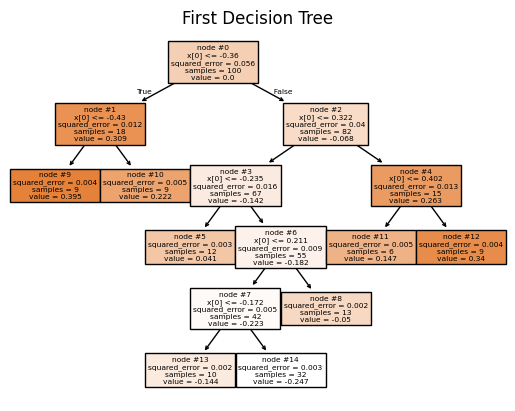

In [7]:
# first tree
tree1 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree1.fit(df['X'].values.reshape(100,1),df['residual1'].values)
plot_tree(tree1,filled=True,node_ids=True)
plt.title("First Decision Tree")
plt.show()

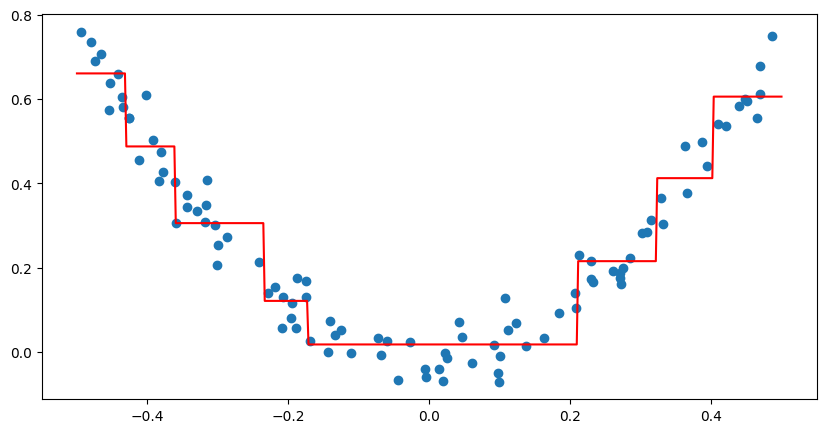

In [8]:
# Testing the model when only one tree is used
# Generating X_test
X_test = np.linspace(-0.5,0.5,500)
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1))
plt.figure(figsize=(10,5))
plt.scatter(df['X'],df['y'])
plt.plot(X_test,y_pred,color='r')

In [10]:
# for next stage preparing residual
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))
df['residual2'] = df['y'] - df['pred2']
print(df.head(5))

          X         y     pred1  residual1     pred2  residual2
0 -0.125460  0.051573  0.265458  -0.213885  0.018319   0.033254
1  0.450714  0.594480  0.265458   0.329021  0.605884  -0.011404
2  0.231994  0.166052  0.265458  -0.099407  0.215784  -0.049732
3  0.098658 -0.070178  0.265458  -0.335636  0.018319  -0.088497
4 -0.343981  0.343986  0.265458   0.078528  0.305964   0.038022


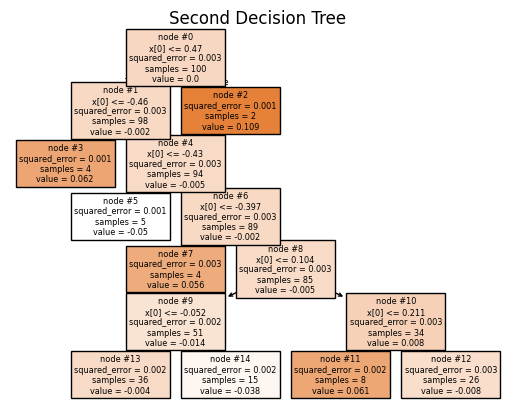

In [11]:
# Second Tree
tree2 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree2.fit(df['X'].values.reshape(100,1),df['residual2'].values)
plot_tree(tree2,filled=True,node_ids=True)
plt.title("Second Decision Tree")
plt.show()

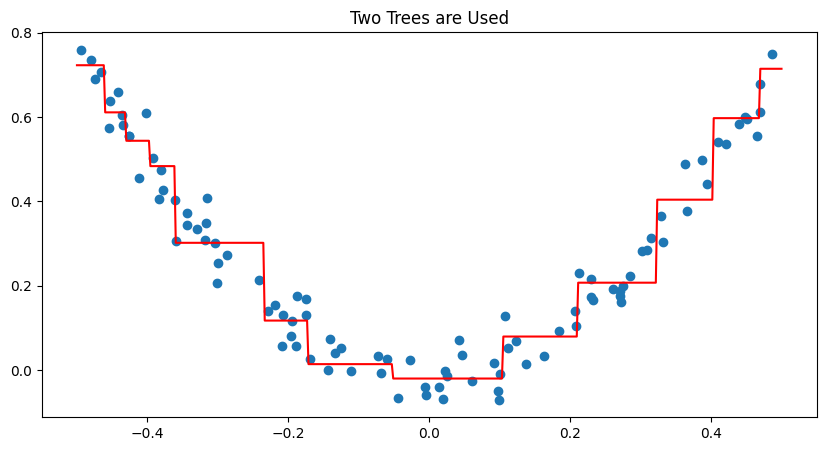

In [14]:
# Testing the model when 2 trees are used
X_test = np.linspace(-0.5,0.5,500)
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(500,1)) for regressor in (tree1,tree2))
plt.figure(figsize=(10,5))
plt.scatter(df['X'],df['y'])
plt.title("Two Trees are Used")
plt.plot(X_test,y_pred,color='r')
plt.show()

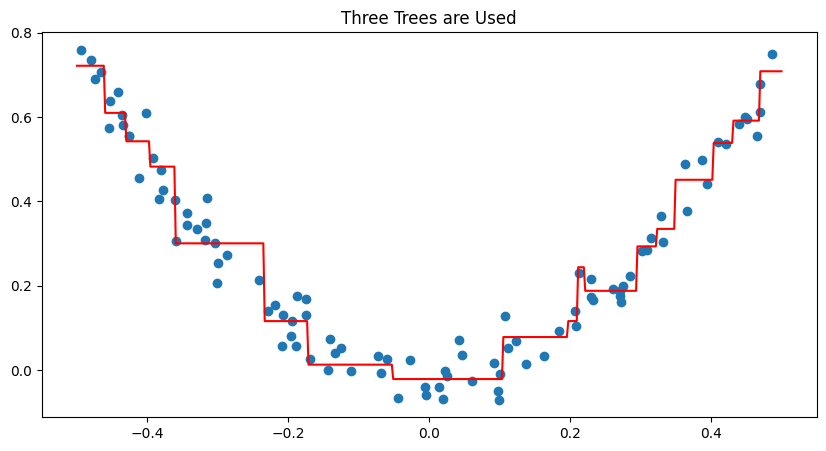

In [18]:
# Similary for next and the last stage we repeat the same thing above
# I just take 3 decision tree but you can take as many you can as per your data
df['pred3'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1)) + tree2.predict(df['X'].values.reshape(100,1))
df['residual3'] = df['y'] - df['pred3']
tree3 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree3.fit(df['X'].values.reshape(100,1),df['residual3'].values)

# Generating test cases
X_test = np.linspace(-0.5,0.5,500)
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(500,1)) for regressor in (tree1,tree2,tree3))
plt.figure(figsize=(10,5))
plt.scatter(df['X'],df['y'])
plt.title("Three Trees are Used")
plt.plot(X_test,y_pred,color='r')
plt.show()

We can actually see that the performance of the model is increasing as we add decision trees. The error that the first model made or simply the loss function is fed to the next model and prediction is made. Basically the perfomance of the model is boost on each step

# Classification

**Algorithm of Gradient Boost - Classification:**

>. The first model prediction will be the log of the odds or simply log(odds)

>. Similar to that of the logistics regression we use here Probability function / sigmoid function or softmax function

>. The residual is calculated by subtracting the  actual - probability

>. Although it is classification algorithm we will use DecisionTreeRegressor having small number of leaf nodes or simply weak DTR

>. The first input is X_train and residual or gamma

>.Similary the steps are repeated again and again until we get a additive model .

Maths Behind it:

# Gradient Boosting for Classification (Math)

---

### 1. Problem Setup
We have training data $(x_i, y_i)$, where:  
- $x_i \in \mathbb{R}^d$ are features  
- $y_i \in \{0,1\}$ are class labels  

We want to learn a classifier using **additive models**:

$$
F_M(x) = F_0(x) + \eta \sum_{m=1}^M h_m(x)
$$

where:
- $F(x)$ is the **log-odds score**  
- $h_m(x)$ are weak learners (decision trees)  
- $\eta$ is learning rate  

---

### 2. Logistic Loss
The loss function is:

$$
L(y, F(x)) = - \Big[ y \log p(x) + (1-y)\log(1-p(x)) \Big]
$$

where probability is obtained from log-odds:

$$
p(x) = \frac{1}{1 + e^{-F(x)}}
$$

---

### 3. Gradient (Residuals)
For each sample, the **negative gradient** (pseudo-residual) is:

$$
r_i^{(m)} = y_i - p_{m-1}(x_i)
$$

where

$$
p_{m-1}(x_i) = \frac{1}{1 + e^{-F_{m-1}(x_i)}}
$$

---

### 4. Fit Weak Learner
Fit a regression tree $h_m(x)$ to predict residuals $r_i^{(m)}$.

---

### 5. Update Rule
Update the model in **log-odds space**:

$$
F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)
$$

---

### 6. Final Probability Prediction
After $M$ rounds, convert log-odds back to probability:

$$
p(x) = \frac{1}{1 + e^{-F_M(x)}}
$$

Class label is decided as:

$$
\hat{y} = \begin{cases}
1 & \text{if } p(x) > 0.5 \\
0 & \text{otherwise}
\end{cases}
$$



In [39]:
df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)
# simple classification dataset

In [40]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry'] == leaf]
  num = temp_df['residual1'].sum()
  den = sum(temp_df['probability1'] * (1-temp_df['probability1']))
  return round(num/den,2)

In [41]:
# initial prediction - prediction1(log-odds)
df['prediction1(log-odds)'] = np.log(5/3)
# using sigmoid function to generate the probability
df['probability1'] = 1/(1+np.exp(-df['prediction1(log-odds)']))
# calculating residual for stage 1
df['residual1'] = df['is_placed'] - df['probability1']
# first Decision tree
tree1 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree1.fit(df[['cgpa','iq']],df['residual1'])
# leaf_entry indexes
df['leaf_entry'] = tree1.apply(df.iloc[:,0:2])
# prediction2(log-odds)
df['prediction2(log-odds)'] = df['prediction1(log-odds)'] + df['leaf_entry'].apply(return_logs)
df.head()

,cgpa,iq,is_placed,prediction1(log-odds),probability1,residual1,leaf_entry,prediction2(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826
4,6.39,148,0,0.510826,0.625,-0.625,3,-2.159174


In [42]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry2'] == leaf]
  num = temp_df['residual2'].sum()
  den = sum(temp_df['probability2'] * (1-temp_df['probability2']))
  return round(num/den,2)

In [43]:
# second stage
df['probability2'] = 1/(1+np.exp(-df['prediction2(log-odds)']))
# calculating residual for stage 2
df['residual2'] = df['is_placed'] - df['probability2']
# second Decision tree
tree2 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree2.fit(df[['cgpa','iq']],df['residual2'])
# leaf_entry indexes
df['leaf_entry2'] = tree2.apply(df.iloc[:,0:2])
# prediction2(log-odds)
df['prediction3(log-odds)'] = df['prediction1(log-odds)'] + df['prediction2(log-odds)'] + df['leaf_entry2'].apply(return_logs)
df.head()

,cgpa,iq,is_placed,prediction1(log-odds),probability1,residual1,leaf_entry,prediction2(log-odds),probability2,residual2,leaf_entry2,prediction3(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-2.768349
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,3.741651
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,3.741651
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,3.741651
4,6.39,148,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,5,-2.768349


In [44]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry3'] == leaf]
  num = temp_df['residual3'].sum()
  den = sum(temp_df['probability3'] * (1-temp_df['probability3']))
  return round(num/den,2)

In [46]:
# second stage
df['probability3'] = 1/(1+np.exp(-df['prediction3(log-odds)']))
# calculating residual for stage 2
df['residual3'] = df['is_placed'] - df['probability3']
# second Decision tree
tree2 = DecisionTreeRegressor(max_leaf_nodes = 8)
tree2.fit(df[['cgpa','iq']],df['residual2'])
# leaf_entry indexes
df['leaf_entry3'] = tree2.apply(df.iloc[:,0:2])
# prediction2(log-odds)
df['prediction4(log-odds)'] = df['prediction1(log-odds)'] + df['prediction2(log-odds)'] + df['prediction3(log-odds)']+ df['leaf_entry3'].apply(return_logs)
df.head()

,cgpa,iq,is_placed,prediction1(log-odds),probability1,residual1,leaf_entry,prediction2(log-odds),probability2,residual2,leaf_entry2,prediction3(log-odds),probability3,residual3,leaf_entry3,prediction4(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-2.768349,0.059059,-0.059059,3,-5.476698
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,3.741651,0.976834,0.023166,1,7.383302
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,3.741651,0.976834,0.023166,1,7.383302
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,3.741651,0.976834,0.023166,1,7.383302
4,6.39,148,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,5,-2.768349,0.059059,-0.059059,5,-5.476698


---
# Hyperparameter tuning of Gradient Boosting Algorithms in sklearn
---

In [50]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [53]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 5],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_clf = GridSearchCV(
    gb_clf, param_grid, cv=5, n_jobs=-1, scoring="accuracy"
)
grid_clf.fit(X, y)

print("Best Params:", grid_clf.best_params_)
print("Best Score:", grid_clf.best_score_)

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 5],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_reg = GridSearchCV(
    gb_reg, param_grid, cv=5, n_jobs=-1, scoring="neg_mean_squared_error"
)
grid_reg.fit(X_train, y_train)

print("Best Params:", grid_reg.best_params_)
print("Best Score:", -grid_reg.best_score_)